{'10-11': 2558, '02-03': 1052, '11-12': 1015, '05-06': 3558, '04-05': 969, '12-13': 1024, '09-10': 1003, '08-09': 1062, '13-14': 1010, '03-04': 1058, '07-08': 963, '01-02': 1319, '06-07': 1149}


<IPython.core.display.Javascript object>


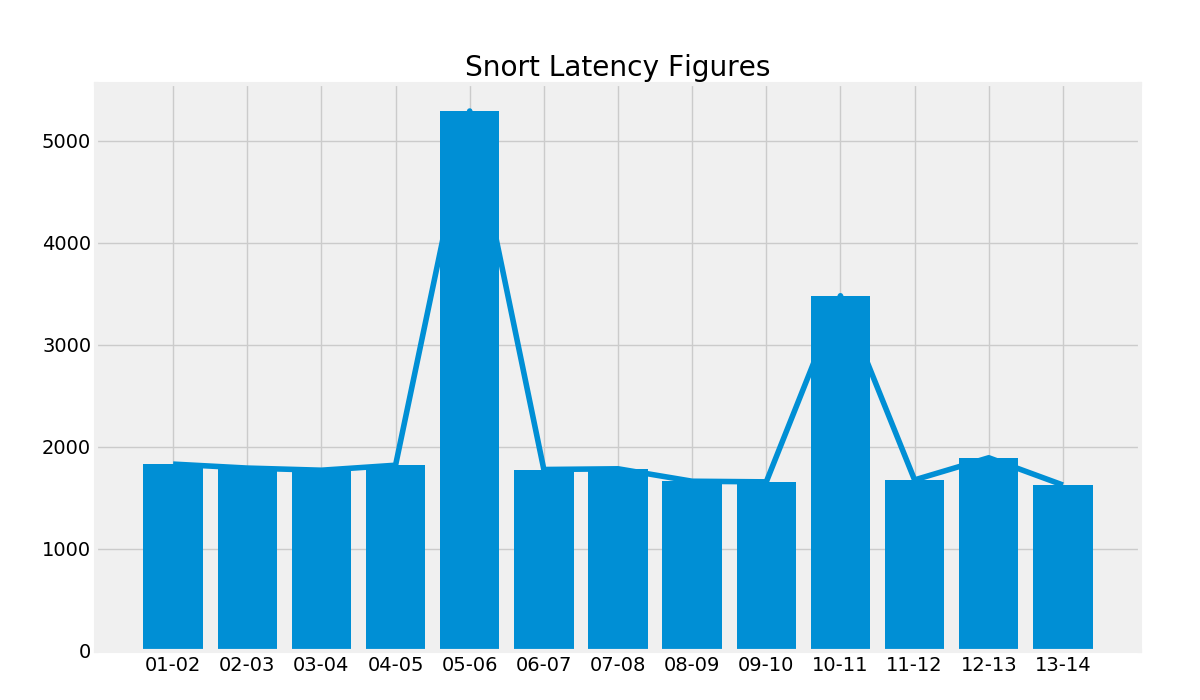

In [5]:
%matplotlib notebook

import Queue
import threading
from threading import Event
import collections
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import style
import xmlrpclib
import time

class MyAnimate(object):
    def __init__(self, i, ax1,hopName):
        self.i = i
        self.ax1 = ax1
        self.x = []
        self.y = []
        self.binName = []
        self.hopName = hopName
        self.i = i

    def setXY(self,xy):
        self.x = []
        self.y = []
        self.binName = []
        i=0
        for binName, latency in sorted(xy.iteritems()):
            self.x.append(binName) #(i)
            self.y.append(latency)
            self.binName.append(binName)
            i+=1

    def animate(self, i):
        xs = self.x
        ys = self.y

        self.ax1.clear()
        self.ax1.bar(xs, ys)
        self.ax1.set_title(self.hopName)
        self.ax1.plot(xs,ys)

        print "Graph " + str(self.i)
        print self.hopName
        print xs
        print ys
        print '' \
              ''
        #for h in xs:
            #self.ax1.text(h, ys[h]+1, self.binName[h], color='black', fontsize=16)
            #self.ax1.text(h, ys[h]/2, ys[h],color='green', fontsize=10)


class TimerThread(threading.Thread):
    def __init__(self, event, pollingTime, rpcServer, queue, hopGraph):
        threading.Thread.__init__(self)
        self.stopped = event
        self.pollingTime = pollingTime
        self.rpcServer = rpcServer
        self.queue = queue
        self.hopGraph = hopGraph

    def run(self):
        while not self.stopped.wait(self.pollingTime):
            print("Timestamp Graph Poll")

            try:
                latencies = self.rpcServer.getFlows()
            except:
                latencies = None

            if latencies:
                print(latencies)
                self.queue.put(latencies, True) #Still needed?
                self.hopGraph[1].setXY(latencies)
            else:
                print("No new Latency Figures")


# def main():

ip_address = "172.16.0.92"

i = 0

style.use('fivethirtyeight')
# fig = plt.figure(i)
fig=plt.figure(figsize=(12, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(1, 1, 1)
myAnimate = MyAnimate(1, ax1,"Snort Latency Figures")
ani = FuncAnimation(fig, myAnimate.animate, 1, interval=50, blit=True)
#ani = animation.FuncAnimation(fig, myAnimate.animate,interval=1000)  # polling time is in secondes, interval is in ms

hopGraph = ((ani,myAnimate))

rpcServer = xmlrpclib.ServerProxy('http://root:netronome@%s:8000' % (ip_address))

stopFlag = Event()
queue = Queue.Queue()
tThread = TimerThread(stopFlag, 1, rpcServer, queue, hopGraph)
tThread.daemon = True
tThread.start()

plt.show()

#     while True:
# 	time.sleep(10)

# if __name__ == '__main__':
#     main()